In [102]:
import pandas as pd
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

### 1.1
#### Use LASSO regression to predict Salary from the other numeric predictors. 

In [103]:
hitter = pd.read_csv("Hitters.csv").dropna().drop(columns=['League','Division','NewLeague','Unnamed: 0'])

In [104]:
hitter.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.000
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.000
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.000
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.500
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.000
6,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,70.000
7,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,100.000
8,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,75.000
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,1100.000
10,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22,517.143


In [105]:
Y = hitter.Salary
X = hitter.drop(columns = ['Salary'])
X_std = preprocessing.normalize(X)


In [97]:
alphas = 10**np.linspace(10,-2,100)*0.5
coefs = []

lasso = Lasso(max_iter = 10000, normalize = True, alpha=0.1)
lasso.fit(X_std, Y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. 

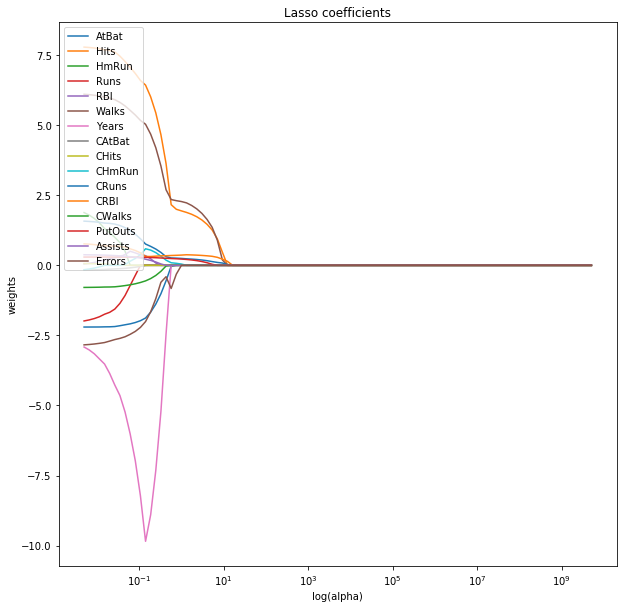

In [98]:
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)
    
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('log(alpha)')
plt.ylabel('weights')
plt.legend(X.columns, loc="upper left")
plt.title('Lasso coefficients')
plt.axis('tight')
plt.show()

Three preditors are:  CHits, CRuns, CRBI

#### Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [99]:
model = LassoCV(cv=10).fit(X_std,Y)
print("The optimal penalty is:",model.alpha_)
#index of three remaining predictors are
index = np.absolute(model.coef_).argsort()[-3:][::-1]
print("Three preditors are: ", X.columns[index[0]],X.columns[index[1]],X.columns[index[2]])

The optimal penalty is: 0.1371821429861081
Three preditors are:  CHits CRuns CRBI


### 1.2
#### Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. 

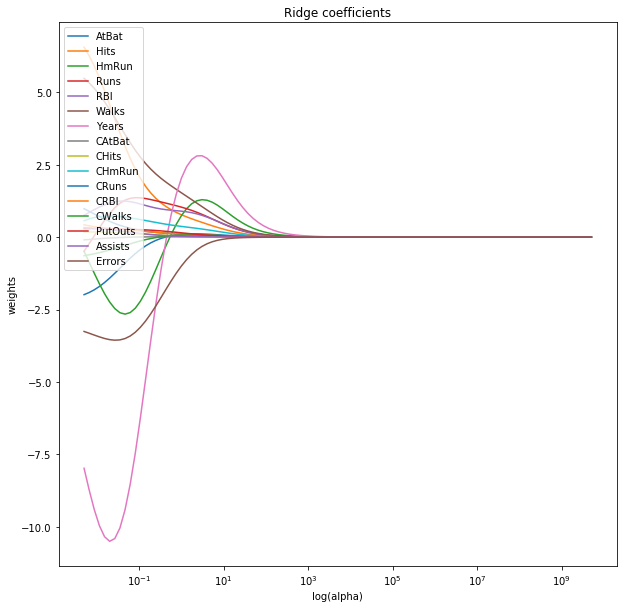

In [107]:
ridge = Ridge(normalize = True)
alphas = 10**np.linspace(10,-2,100)*0.5
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('log(alpha)')
plt.ylabel('weights')
plt.legend(X.columns, loc="upper left")
plt.title('Ridge coefficients')
plt.axis('tight')
plt.show()

Three preditors are:  CHits, CRuns, CRBI

#### cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [108]:
ridge_model = RidgeCV(cv=10).fit(X_std,Y)
print("The optimal penalty is:",ridge_model.alpha_)
#index of three remaining predictors are
index = np.absolute(ridge_model.coef_).argsort()[-3:][::-1]
print("Three preditors are: ", X.columns[index[0]],X.columns[index[1]],X.columns[index[2]])

The optimal penalty is: 0.1
Three preditors are:  CHits CRuns CRBI


/Users/evelyn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 2. 
#### Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

Bias is the difference between our average prediction from model and the actual correct value. Variance is the variability of model prediction for a given data point or a value which tells us spread of our data.

Bias-variance tradeoff is finding a balance between overfitting and underfitting. When the model is too simple and has very few parameters then it may have high bias and low variance. But when when the model has large number of parameters then it’s going to have high variance and low bias.